# k Nearest Neighbors
## Classification
Реализуйте алгоритм к ближайших соседей. 
Создадим искуственный набор данных из 100 наблюдений с 3 классами.
Необходимо реализовать функцию на входе которой:
- тренировочный набор данных (признаки и метки классов);
- тестовый набор данных (признаки);
- $k$ - количество ближайших соседей.

На выходе функция должна возвращать метки тестового набора данных. 
В качестве расстояния между объектами следует использовать Эвклидову меру.

**Алгоритм к ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

В многоклассовой модели может возникнуть неопределенность, что в 3 найденных объектак будут присутсвовать разные классы. В этом случае необходимо присваивать класс случайным образом.

In [19]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import math
import random
import numpy as np

In [20]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, cluster_std = 2, random_state=17)

Text(0.5,1,'Initial data')

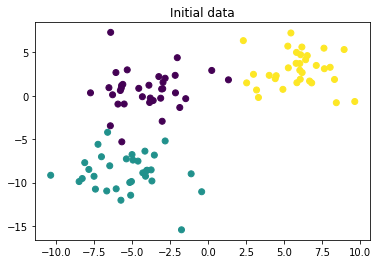

In [21]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

In [22]:
def get_distance(first_point, second_point):
    square_sum = 0
    for dimension in range(len(first_point)):
        square_sum = square_sum + (first_point[dimension] - second_point[dimension]) ** 2
    
    return math.sqrt(square_sum);

In [23]:
def calculate_distances(x_train, point):
    distances = []
    for index, train_point in enumerate(x_train):
        distances.append([index, get_distance(point, train_point)])

    distances.sort(key = lambda x: x[1])
    
    return distances;

In [24]:
def get_nearest_neighbours_indexes_for_point(x_train, point, k):
    distances = calculate_distances(x_train, point)

    return list(map(lambda p: p[0], distances[:k]))

In [25]:
def get_appropriate_category(categories):
    counts = {}
    for cat in categories:
        if (cat in counts):
            counts[cat] = counts[cat] + 1
        else:
            counts[cat] = 1
    keys_list = list(counts.keys())
    values_list = list(counts.values())

    max_count = max(values_list)
    
    maximums = []
    for cat in keys_list:
        if counts[cat] == max_count:
            maximums.append(cat);

    return random.choice(maximums)

In [26]:
def funct_kNN(x_train, y_train, x_test, k):
    y_test = []
    
    for test_point in x_test:
        neighbours_indeces = get_nearest_neighbours_indexes_for_point(x_train, test_point, k)
        neighbours_categories = list(map(lambda index: y_train[index], neighbours_indeces))
        appropriate_category = get_appropriate_category(neighbours_categories)
        y_test.append(appropriate_category);
    
    return np.array(y_test)

Для корректного анализа построенного классификатора, разбейте исходный набор данных на тренировочный и тестовый.
Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой точность (Accuracy). Точность это отношение количества правильно классифицированных объектов ко всему количеству объектов.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def calculate_accuracy(k):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=42)
    y_pred = funct_kNN(x_train, y_train, x_test, k)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

for k in (1, 3, 5, 7, 9):
    print('Для', k, 'соседей вероятность попадания равна', calculate_accuracy(k))


Для 1 соседей вероятность попадания равна 0.94
Для 3 соседей вероятность попадания равна 0.98
Для 5 соседей вероятность попадания равна 0.98
Для 7 соседей вероятность попадания равна 0.96
Для 9 соседей вероятность попадания равна 0.96


Постройте разделающие поверхности, которые строит классификатор

In [28]:
def print_decision_surace(k):
    h = 0.2
    x0_min, x0_max = np.min(X[:,0]) - 1, np.max(X[:,0]) + 1
    x1_min, x1_max = np.min(X[:,1]) - 1, np.max(X[:,1]) + 1

    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

    z = funct_kNN(X, Y, np.stack((xx0.ravel(),xx1.ravel())).transpose(), k).reshape(xx0.shape)

    plt.contourf(xx0, xx1, z, cmap=plt.cm.RdBu, alpha=.8)
    plt.scatter(X[:,0], X[:,1], c = Y)
    plt.show()

Для 1 соседей


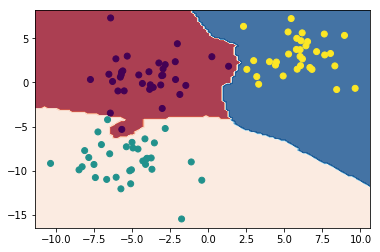

Для 3 соседей


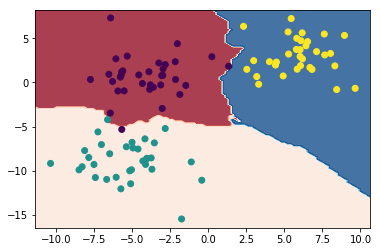

Для 5 соседей


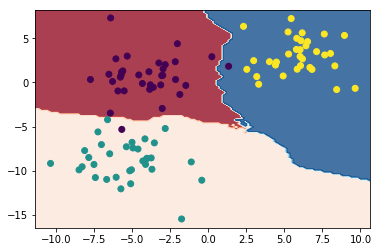

Для 7 соседей


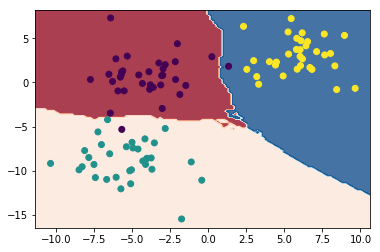

Для 9 соседей


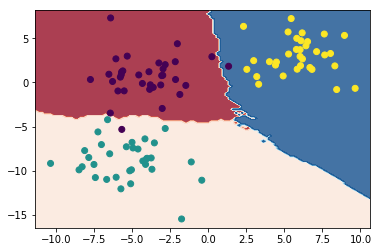

In [29]:
for k in (1, 3, 5, 7, 9):
    print('Для', k, 'соседей')
    print_decision_surace(k)

## Regression
Напишите функцию для регрессии методом к ближайших соседей.

Для проверки вашего регрессионной модели создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренеровочную выборку. 
Задача: предсказать функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.

$y = sin(x)$

**Алгоритм регрессии:**

Для каждого тестового обекта:
1. вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
2. нахождение $k$ объектов с минимальными расстояниями;
3. вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

In [30]:
values = []
sinuses = []
value_min = 0
value_max = 5
values_count = 10

for index in range(values_count):
    value = random.uniform(value_min, value_max)
    sinus = math.sin(value)
    values.append(value)
    sinuses.append(sinus)

def get_appropriate_value(values, sinuses, value, k):
    nearest_indexes = get_nearest_neighbours_indexes_for_point(list(map(lambda val: [val], values)), [value], k)

    sinuses_sum = 0
    for index in nearest_indexes:
        sinuses_sum += sinuses[index]
    
    return sinuses_sum / k

Постройте на одном графике исходную функцию, тренировочные объекты и предсказанные функции для каждого значения $k$.

Для 1 соседей


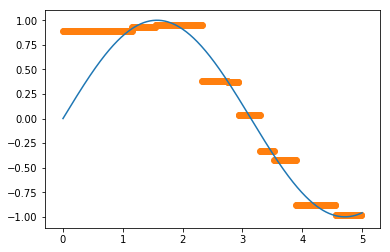

Для 3 соседей


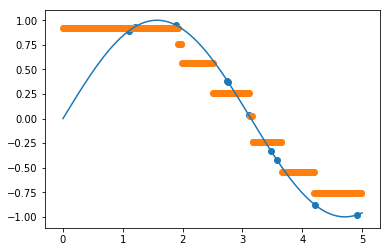

Для 5 соседей


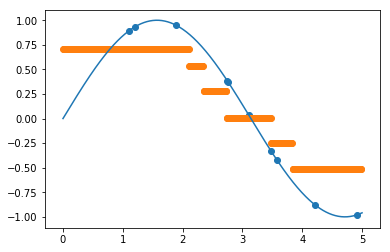

Для 7 соседей


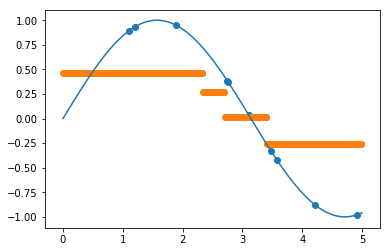

Для 9 соседей


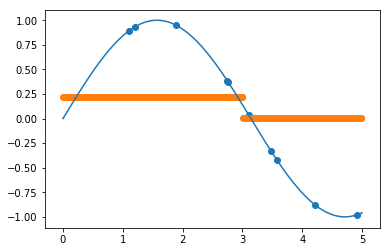

In [31]:
def show_result(k):
    pred_values = np.arange(value_min, value_max, 0.01)
    pred_sinuses = list(map(lambda val: get_appropriate_value(values, sinuses, val, k), pred_values))

    xpts = np.linspace(value_min, value_max, 500)
    test_v = np.vectorize(lambda val: math.sin(val))
    plt.plot(xpts, test_v(xpts))
    plt.scatter(values, sinuses)
    plt.scatter(pred_values, pred_sinuses)
    plt.show()

for k in (1, 3, 5, 7, 9):
    print('Для', k, 'соседей')
    show_result(k)